In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [6]:
data=pd.read_csv('Growth.csv')

In [7]:
data.head()

,Population,PerCapita,Trade,Health,Unemployment,Environment,Growth
0,7945977,162.1844,-0.122353,91.5259,13.82,10848.0,1.83
1,8091461,185.3671,-0.072269,98.5637,13.03,11385.2,1.90
2,8245475,187.2283,-0.047386,106.1440,12.27,12412.3,1.96
3,8406910,197.7579,-0.040201,116.3432,11.35,12868.2,2.00
4,8575075,218.3510,-0.034844,110.8334,10.60,13984.4,2.04


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    74 non-null     int64  
 1   PerCapita     74 non-null     float64
 2   Trade         74 non-null     float64
 3   Health        74 non-null     float64
 4   Unemployment  74 non-null     float64
 5   Environment   74 non-null     float64
 6   Growth        74 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.2 KB


In [9]:
data.describe()

,Population,PerCapita,Trade,Health,Unemployment,Environment,Growth
count,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1.577405e+07,1110.118619,-1.331458,116.226327,7.366946,13909.881081,1.385270
std,4.460055e+06,1373.914004,1.807432,39.127930,2.826959,5079.842344,0.710028
min,7.945977e+06,117.962300,-6.541885,41.305000,3.880000,5091.300000,0.250000
25%,1.191491e+07,202.906175,-1.377518,98.563700,4.780000,10928.900000,0.827500
50%,1.643257e+07,398.175250,-0.747307,134.669250,7.670000,12868.200000,1.370000
75%,1.962801e+07,1195.422950,-0.075159,146.950300,8.850000,17440.400000,1.995000
max,2.189358e+07,4388.201900,0.150169,159.464700,14.220000,23427.900000,2.440000


In [10]:
data.isnull().sum()

Population      0
PerCapita       0
Trade           0
Health          0
Unemployment    0
Environment     0
Growth          0
dtype: int64

In [11]:
data.corr()

,Population,PerCapita,Trade,Health,Unemployment,Environment,Growth
Population,1.000000,0.762442,-0.694403,-0.135073,-0.456197,0.192189,-0.935902
PerCapita,0.762442,1.000000,-0.749847,0.151943,-0.434199,0.458497,-0.791256
Trade,-0.694403,-0.749847,1.000000,0.047613,0.404720,-0.155717,0.654954
Health,-0.135073,0.151943,0.047613,1.000000,0.069480,0.273130,0.084332
Unemployment,-0.456197,-0.434199,0.404720,0.069480,1.000000,-0.309198,0.276133
Environment,0.192189,0.458497,-0.155717,0.273130,-0.309198,1.000000,-0.161673
Growth,-0.935902,-0.791256,0.654954,0.084332,0.276133,-0.161673,1.000000


<Axes: >

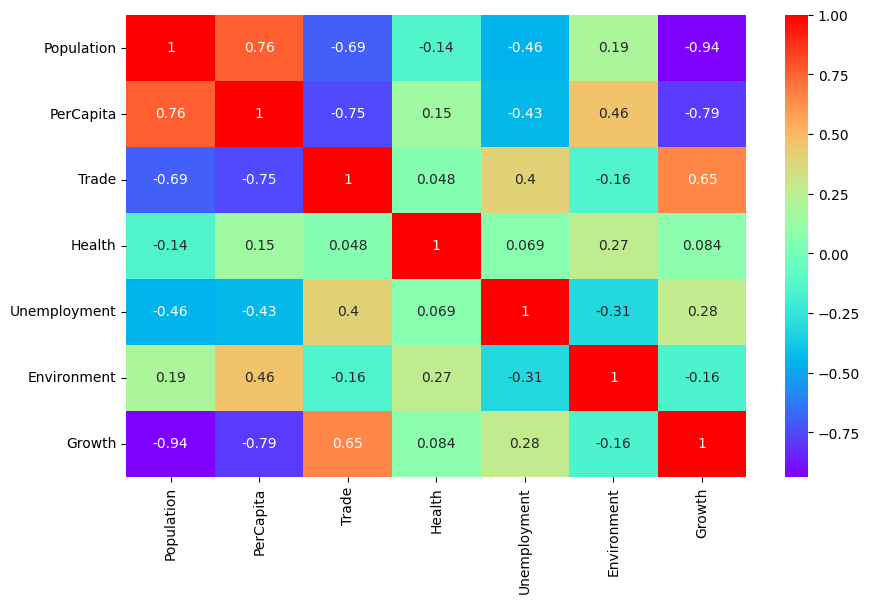

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

Text(0, 0.5, 'Total Population')

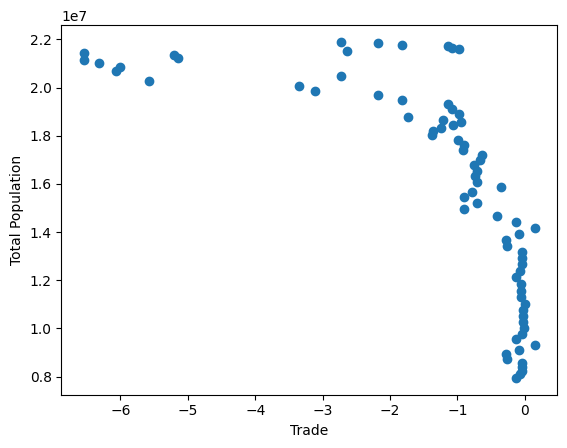

In [13]:
plt.scatter(data['Trade'],data['Population'])
plt.xlabel('Trade')
plt.ylabel('Total Population')

Text(0, 0.5, 'Growth Change')

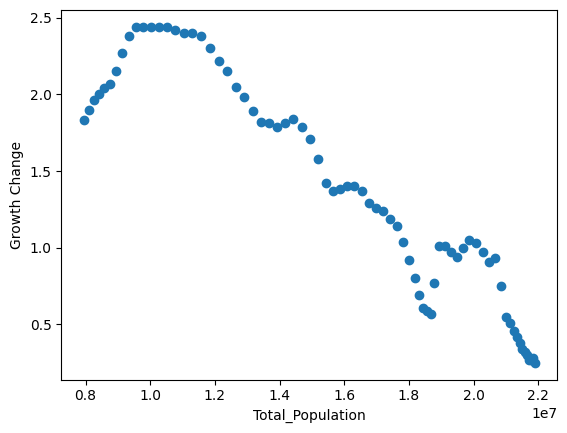

In [14]:
plt.scatter(data['Population'],data['Growth'])
plt.xlabel('Total_Population')
plt.ylabel('Growth Change')

Text(0, 0.5, 'Growth Change')

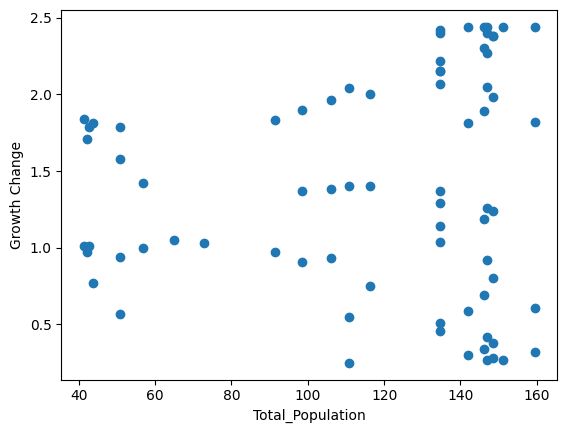

In [15]:
plt.scatter(data['Health'],data['Growth'])
plt.xlabel('Total_Population')
plt.ylabel('Growth Change')

In [16]:
data.drop(columns="Health",inplace=True)

In [ ]:
data.head()

,Population,PerCapita,Trade,Unemployment,Environment,Growth
0,7945977,162.1844,-0.122353,13.82,10848.0,1.83
1,8091461,185.3671,-0.072269,13.03,11385.2,1.90
2,8245475,187.2283,-0.047386,12.27,12412.3,1.96
3,8406910,197.7579,-0.040201,11.35,12868.2,2.00
4,8575075,218.3510,-0.034844,10.60,13984.4,2.04


Text(0, 0.5, 'Growth change %')

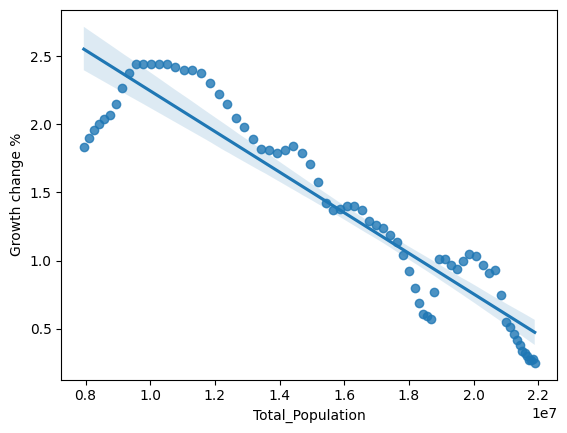

In [17]:
sns.regplot(x='Population',y='Growth',data=data)
plt.xlabel('Total_Population')
plt.ylabel('Growth change %')

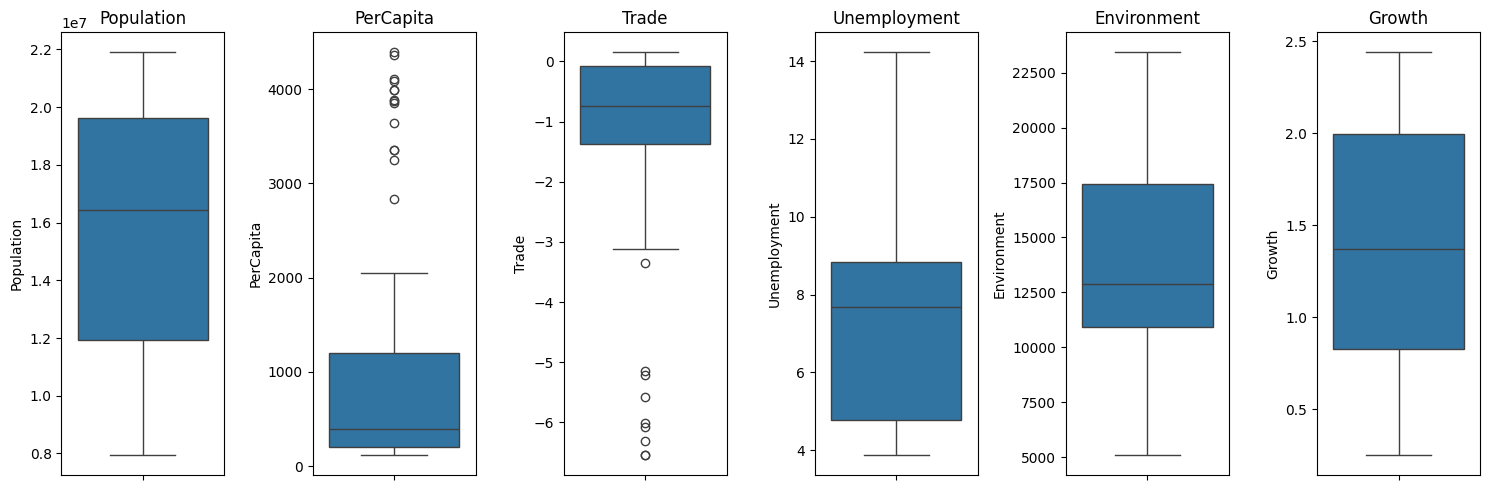

In [18]:
fig, axes = plt.subplots(1, len(data.columns), figsize=(15, 5))

# Iterate through each column and create a boxplot
for i, column in enumerate(data.columns):
    sns.boxplot(data[column], ax=axes[i])
    axes[i].set_title(column)
# Adjust layout
plt.tight_layout()

plt.show()

In [19]:
# Dependent and independent data
x=data.drop('Growth',axis=1)
y=data['Growth']

In [20]:
x.head()

,Population,PerCapita,Trade,Unemployment,Environment
0,7945977,162.1844,-0.122353,13.82,10848.0
1,8091461,185.3671,-0.072269,13.03,11385.2
2,8245475,187.2283,-0.047386,12.27,12412.3
3,8406910,197.7579,-0.040201,11.35,12868.2
4,8575075,218.3510,-0.034844,10.60,13984.4


In [21]:
y.head()

0    1.83
1    1.90
2    1.96
3    2.00
4    2.04
Name: Growth, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)

x_test shape: (15, 5)
y_test shape: (15,)
x_train shape: (59, 5)
y_train shape: (59,)


# Create an Evaluate Function to give all metrics after model Training

In [24]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1824
- Mean Absolute Error: 0.1574
- R2 Score: 0.9326
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2001
- Mean Absolute Error: 0.1799
- R2 Score: 0.9200


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.2245
- Mean Absolute Error: 0.1815
- R2 Score: 0.8979
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2317
- Mean Absolute Error: 0.1940
- R2 Score: 0.8928


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1824
- Mean Absolute Error: 0.1574
- R2 Score: 0.9326
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2001
- Mean Absolute Error: 0.1798
- R2 Score: 0.9200


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0671
- Mean Absolute Error: 0.0463
- R2 Score: 0.9909
-----------------------

In [27]:
#Scaling the sata
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [28]:
x_test_S=scale.fit_transform(x_test)
x_test_S

array([[-0.11227048, -0.60338821,  0.50388957, -1.06300735, -0.54226732],
       [ 1.32998863,  2.29864918, -3.00296431, -1.41126249,  1.03109128],
       [ 0.91622763,  0.01833411, -0.30613328,  0.05993779, -0.33655725],
       [-0.38213886, -0.5755503 ,  0.5829136 ,  0.00307981, -1.1520672 ],
       [-1.15925829, -0.66705267,  0.71160219, -0.16749414,  0.26386942],
       [ 0.51723944, -0.36294972,  0.22182467,  2.13525413,  1.03109128],
       [-1.5211345 , -0.63617762,  0.6941469 ,  1.71237289, -0.54226732],
       [-0.32983839, -0.567251  ,  0.57362763,  0.05993779, -1.09841154],
       [-0.89169022, -0.6597217 ,  0.73940731, -0.19236951,  1.81754026],
       [-1.38040346, -0.5755503 ,  0.5829136 ,  0.34067408, -0.33803934],
       [ 0.66649838, -0.20734892,  0.0264431 ,  1.11536408, -1.65760006],
       [ 0.99753917,  0.28997461, -1.04289897, -0.6081435 , -0.02169326],
       [-1.05593987, -0.67035736,  0.72390103,  0.1949755 ,  0.07123779],
       [ 1.04200345,  0.43062691, -1.1

In [29]:
x_train_S=scale.transform(x_train)
x_train_S

array([[-5.45419460e-01, -6.34785054e-01,  7.08366333e-01,
        -1.67494138e-01, -1.66753407e+00],
       [ 2.86884058e-01, -4.72724359e-01,  3.34338170e-01,
        -1.41126249e+00, -2.04470992e-01],
       [-6.59909710e-01, -6.53523156e-01,  6.65526001e-01,
        -8.39129050e-01, -1.77138050e+00],
       [-1.30057243e+00, -5.81698713e-01,  6.87540929e-01,
         8.48842288e-01, -2.56764732e-01],
       [ 7.94315151e-01, -1.52040548e-01,  1.74165544e-01,
        -1.10636156e-01, -6.33656189e-01],
       [ 1.89637137e-01, -4.96903746e-01,  3.27072138e-01,
        -1.42903061e+00, -2.56764732e-01],
       [ 8.76189052e-01, -4.29954132e-02,  8.48825749e-02,
         3.07980735e-03, -5.42267321e-01],
       [ 1.34737650e+00,  2.50842646e+00, -7.74337282e-01,
        -1.47878135e+00,  1.81754026e+00],
       [ 7.17450695e-01, -1.38154963e-01,  1.93212476e-01,
         3.40674075e-01, -1.15206720e+00],
       [ 5.60250795e-01, -3.40916574e-01,  1.71485910e-01,
         1.99310917e+00

# Model Training and Prediction

In [30]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [31]:
reg.fit(x_train_S,y_train)

LinearRegression()

In [32]:
print(reg.coef_)

[-0.67653191 -0.1863545  -0.06462143 -0.14036009  0.0328038 ]


In [33]:
print(reg.intercept_)

1.4236593083421931


In [34]:
#on which parameters the model has been trained
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [35]:
#Prediction with test data
reg_pred=reg.predict(x_test)
reg_pred

e:\Projects\Machine_learning\Srilanka_Growth_Prediction\Srilanka_Growth_Prediction\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ -9931418.77074699, -14495163.46274479, -13185688.53437793,
        -9077667.64667325,  -6618621.93468827, -11922979.49053632,
        -5473793.03085003,  -9243138.62258688,  -7464949.51676601,
        -5919044.42771869, -12395710.61836515, -13442972.4450598 ,
        -6945550.31957538, -13583743.33442024, -14600091.59050179])

In [36]:
y_pred=reg.predict(x_test)
y_pred

e:\Projects\Machine_learning\Srilanka_Growth_Prediction\Srilanka_Growth_Prediction\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ -9931418.77074699, -14495163.46274479, -13185688.53437793,
        -9077667.64667325,  -6618621.93468827, -11922979.49053632,
        -5473793.03085003,  -9243138.62258688,  -7464949.51676601,
        -5919044.42771869, -12395710.61836515, -13442972.4450598 ,
        -6945550.31957538, -13583743.33442024, -14600091.59050179])

In [37]:
reg.score(x_train_S,y_train)

0.9326123050348424

# Assumption

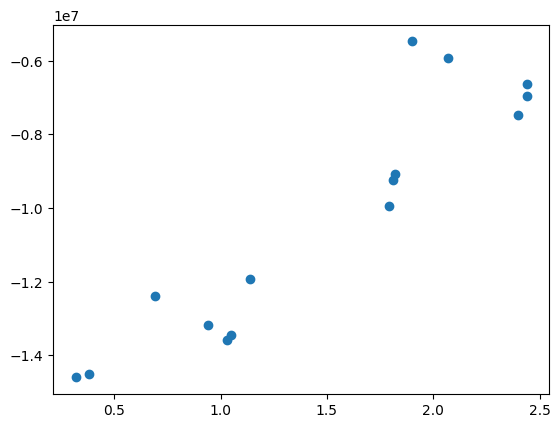

In [38]:
#Scatter plot for prediction
plt.scatter(y_test,reg_pred)

#if the plot is linear prediction is almost good

In [39]:
#Residual or error
residual=y_test-reg_pred
residual.count()

15

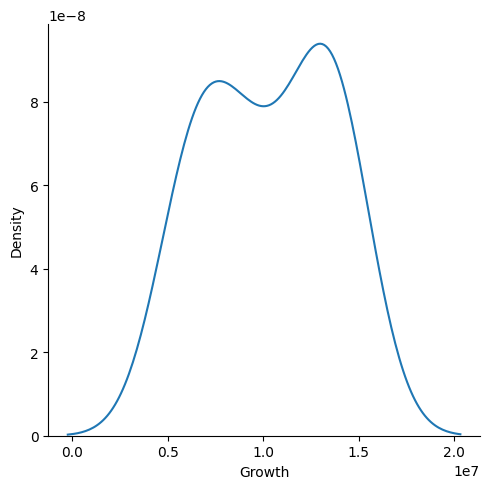

In [40]:
#plot this residual
sns.displot(residual,kind='kde')

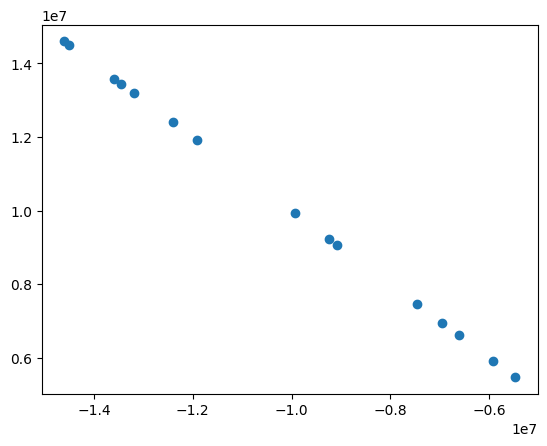

In [41]:
#Scatter plot respect to prediction and residual
#Uniform Matrix
plt.scatter(reg_pred,residual)

# Pickling the model file for deployment

In [42]:
import pickle

In [43]:
pickle.dump(reg,open('regmodel.pkl','wb'))

In [44]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [45]:
pickle.dump(scale,open('scaling.pkl','wb'))